In [ ]:
%matplotlib inline
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
import numpy as np
from io import BytesIO
from IPython.display import display, HTML
import cv2
#url = "http://www.heatonresearch.com/images/about-jeff.jpg"

images = [
    "https://upload.wikimedia.org/wikipedia/commons/9/92/Brookings.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/f/ff/" + 
        "WashU_Graham_Chapel.JPG",
    "https://upload.wikimedia.org/wikipedia/commons/9/9e/SeigleHall.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/a/aa/WUSTLKnight.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/3/32/WashUABhall.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/c/c0/Brown_Hall.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/f/f4/South40.jpg"    
]

def make_square(img):


  cols,rows = img.size
    
  if rows>cols:
    pad = (rows-cols)/2
    img = img.crop((pad,0,cols,cols))
  else:
    pad = (cols-rows)/2
    img = img.crop((0,pad,rows,rows))
  return img
    
x = []    
y = []

loaded_images = []
    
for url in images:
    ImageFile.LOAD_TRUNCATED_IMAGES = False
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img.load()
    img = make_square(img)
    img = img.resize((128,128), Image.ANTIALIAS)
    
    loaded_images.append(img)
    #print(url)
    #display(img)
    img_array = np.asarray(img)
    img_gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
    img_gray = img_gray.flatten()
    img_gray = img_gray.astype(np.float32)
    img_gray = (img_gray-128)/128
        
    img_array = img_array.flatten()
    img_array = img_array.astype(np.float32)
    img_array = (img_array-128)/128
        
    x.append(img_gray)
    y.append(img_array)
    
x = np.array(x)
y = np.array(y)

print(x.shape)
print(y.shape)


(7, 16384)
(7, 49152)


In [ ]:
%matplotlib inline
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO
from sklearn import metrics
import numpy as np
import pandas as pd
import tensorflow as tf
from IPython.display import display, HTML 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

# Fit regression DNN model.
print("Creating/Training neural network")
model = Sequential()
model.add(Dense(100, input_dim=x.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(y.shape[1])) # Multiple output neurons
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x,y,verbose=1,epochs=20)

print("Neural network trained")


Creating/Training neural network
Epoch 1/20
1/1 [==============================] - 0s 1ms/step - loss: 0.2785
Epoch 2/20
1/1 [==============================] - 0s 1ms/step - loss: 0.2754
Epoch 3/20
1/1 [==============================] - 0s 1ms/step - loss: 0.2505
Epoch 4/20
1/1 [==============================] - 0s 1ms/step - loss: 0.2075
Epoch 5/20
1/1 [==============================] - 0s 2ms/step - loss: 0.1887
Epoch 6/20
1/1 [==============================] - 0s 1ms/step - loss: 0.1562
Epoch 7/20
1/1 [==============================] - 0s 1ms/step - loss: 0.1373
Epoch 8/20
1/1 [==============================] - 0s 1ms/step - loss: 0.1245
Epoch 9/20
1/1 [==============================] - 0s 1ms/step - loss: 0.1111
Epoch 10/20
1/1 [==============================] - 0s 1ms/step - loss: 0.0984
Epoch 11/20
1/1 [==============================] - 0s 1ms/step - loss: 0.0865
Epoch 12/20
1/1 [==============================] - 0s 1ms/step - loss: 0.0734
Epoch 13/20
1/1 [=======================

In [ ]:
a=np.reshape(x[0],(1,16384))

In [ ]:
y_predict=model.predict(a)

In [ ]:
y_predict.shape

(1, 49152)

In [ ]:
img_array2=y_predict

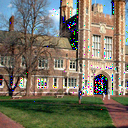

In [ ]:
#cols, rows = img.
img_array2 = y_predict.reshape(128,128,3)
img_array2 = (img_array2*128)+128
img_array2 = img_array2.astype(np.uint8)
img2 = Image.fromarray(img_array2, 'RGB')
#print("After auto encode noise removal")
display(img2)

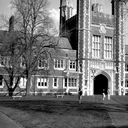

In [ ]:
img_array2 = x[0].reshape(128,128)
img_array2 = (img_array2*128)+128
img_array2 = img_array2.astype(np.uint8)
img2 = Image.fromarray(img_array2, 'L')
#print("After auto encode noise removal")
display(img2)

In [ ]:
!wget -O 1.jpg 'https://www.cnu.org/sites/default/files/styles/public_square_feature_image/public/lower-east-side-nthp.jpg?itok=nAHZ_1O9'

--2020-11-11 05:06:13--  https://www.cnu.org/sites/default/files/styles/public_square_feature_image/public/lower-east-side-nthp.jpg?itok=nAHZ_1O9
Resolving www.cnu.org (www.cnu.org)... 74.121.194.98
Connecting to www.cnu.org (www.cnu.org)|74.121.194.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 417677 (408K) [image/jpeg]
Saving to: ‘1.jpg’

1.jpg               100%[===================>] 407.89K   619KB/s    in 0.7s    

2020-11-11 05:06:14 (619 KB/s) - ‘1.jpg’ saved [417677/417677]



In [ ]:
 url= 'https://www.cnu.org/sites/default/files/styles/public_square_feature_image/public/lower-east-side-nthp.jpg?itok=nAHZ_1O9'
 response = requests.get(url)
 img = Image.open(BytesIO(response.content))
 img.load()
 img = make_square(img)
 new = img.resize((128,128), Image.ANTIALIAS)

In [ ]:
img_array = np.asarray(new)
img_gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
img_gray = img_gray.flatten()
img_gray = img_gray.astype(np.float32)
img_gray_1 = (img_gray-128)/128

In [ ]:
img_gray_1.shape

(16384,)

In [ ]:
a=np.reshape(img_gray_1,(1,16384))

In [ ]:
y_predict=model.predict(a)

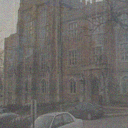

In [ ]:
img_array2=y_predict
#cols, rows = img.
img_array2 = y_predict.reshape(128,128,3)
img_array2 = (img_array2*128)+128
img_array2 = img_array2.astype(np.uint8)
img2 = Image.fromarray(img_array2, 'RGB')
#print("After auto encode noise removal")
display(img2)